<a href="https://colab.research.google.com/github/Md-Ashik-Mia/213002158-CSE412-221D13-LabReport03-mlpFromScratch/blob/main/213002158_cse412_221d13_labreport03_mlpfromscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Training data for XOR problem
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

targets = np.array([[0], [1], [1], [0]])

In [ ]:
# Activation functions with derivatives
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.where(x > 0, x, 0)

def relu_grad(x):
    return np.where(x > 0, 1.0, 0.0)


In [ ]:
class NeuralNet:
    def __init__(self, activation="sigmoid", learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Random initialization of weights and biases
        self.W_hidden = np.random.randn(2, 2)
        self.b_hidden = np.zeros((1, 2))
        self.W_output = np.random.randn(2, 1)
        self.b_output = np.zeros((1, 1))

        # Choose activation
        if activation == "sigmoid":
            self.activation = sigmoid
            self.activation_grad = sigmoid_grad
        elif activation == "relu":
            self.activation = relu
            self.activation_grad = relu_grad

    def forward_pass(self, X):
        self.Z_hidden = np.dot(X, self.W_hidden) + self.b_hidden
        self.A_hidden = self.activation(self.Z_hidden)

        self.Z_output = np.dot(self.A_hidden, self.W_output) + self.b_output
        self.A_output = sigmoid(self.Z_output)   # output layer fixed as sigmoid
        return self.A_output

    def backward_pass(self, X, y, predictions):
        n_samples = X.shape[0]

        # Output layer error
        dZ_output = (predictions - y) * sigmoid_grad(self.Z_output)
        dW_output = np.dot(self.A_hidden.T, dZ_output) / n_samples
        db_output = np.mean(dZ_output, axis=0, keepdims=True)

        # Hidden layer error
        dA_hidden = np.dot(dZ_output, self.W_output.T)
        dZ_hidden = dA_hidden * self.activation_grad(self.Z_hidden)
        dW_hidden = np.dot(X.T, dZ_hidden) / n_samples
        db_hidden = np.mean(dZ_hidden, axis=0, keepdims=True)

        # Update weights
        self.W_hidden -= self.learning_rate * dW_hidden
        self.b_hidden -= self.learning_rate * db_hidden
        self.W_output -= self.learning_rate * dW_output
        self.b_output -= self.learning_rate * db_output

    def fit(self, X, y):
        for _ in range(self.epochs):
            predictions = self.forward_pass(X)
            self.backward_pass(X, y, predictions)

    def predict(self, X):
        probs = self.forward_pass(X)
        return (probs >= 0.5).astype(int)


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluation metrics
def compute_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def compute_precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-9)

def compute_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-9)

def compute_f1(y_true, y_pred):
    p = compute_precision(y_true, y_pred)
    r = compute_recall(y_true, y_pred)
    return (2 * p * r) / (p + r + 1e-9)

def show_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_value = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_value:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()



Running experiment with: learning_rate=0.1, epochs=1000, activation=sigmoid
Accuracy: 0.75
Precision: 0.67
Recall: 1.00
F1-score: 0.80


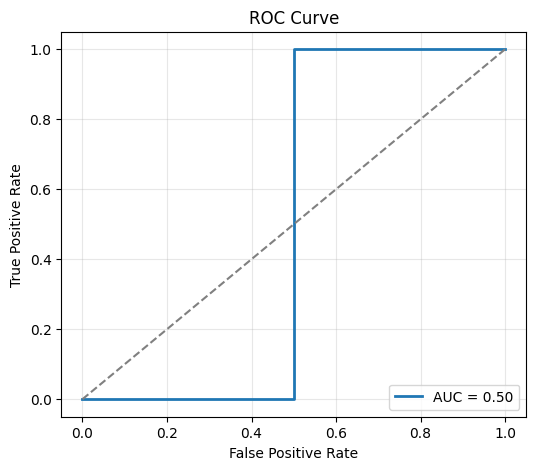


Running experiment with: learning_rate=0.5, epochs=5000, activation=relu
Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1-score: 0.67


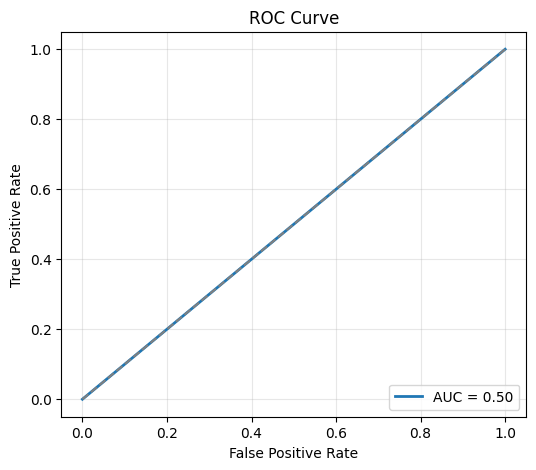

In [ ]:
if __name__ == "__main__":
    experiments = [
        {"lr": 0.1, "epochs": 1000, "act": "sigmoid"},
        {"lr": 0.5, "epochs": 5000, "act": "relu"},
    ]

    for config in experiments:
        print("\nRunning experiment with:",
              f"learning_rate={config['lr']},",
              f"epochs={config['epochs']},",
              f"activation={config['act']}")

        model = NeuralNet(
            activation=config["act"],
            learning_rate=config["lr"],
            epochs=config["epochs"]
        )

        model.fit(inputs, targets)
        predictions = model.predict(inputs)
        prob_scores = model.forward_pass(inputs)

        acc = compute_accuracy(targets, predictions)
        prec = compute_precision(targets, predictions)
        rec = compute_recall(targets, predictions)
        f1 = compute_f1(targets, predictions)

        print(f"Accuracy: {acc:.2f}")
        print(f"Precision: {prec:.2f}")
        print(f"Recall: {rec:.2f}")
        print(f"F1-score: {f1:.2f}")

        show_roc_curve(targets, prob_scores)
